In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

"""
This is a notebook, which contains my experiments with the red-wine-quality dataset. 
The file will include the dataset exploration, classification and whatever I come up with.
"""

wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
#showcasing the head of the dataset
wine.drop_duplicates(inplace = True)
wine.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

# Dataset exploration

In [2]:
minimum = wine['quality'].min()
minimum

3

In [3]:
maximum = wine['quality'].max()
maximum

8

The maximum value, associated with a wine's quality is *8*, while the minimum one is *3*. Later on, based on the range of the variable, qualitative values will be assigned to each quality variable. Next, I will examine the relationships of other variables with the *quality* predictor.

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


The dataset should not require too much cleaning, since it has already been preprocessed and made convenient to use. It can also be seen from the **info** method, that the dataset contains no **NaN**, **None** values.

In [5]:
res = pd.cut(wine['quality'], 3, labels=['bad', 'medium', 'good'])
wine.rename(columns = {'quality':'quality_quant'}, inplace = True)
pd.concat((wine,res), axis=1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality_quant quality  
0         9.4              5  medium  
1         9.8              5  medium  
2         9.8              5  medium  
3         9.8              6  medium  
5         9.4              5  medium  
...       ...            ...     ...  
1593      9.5              6  medium  
1594     10.5              5  medium  
1595     11.2              6  medium  
1597     10.2              5  medium  
1598     11.0              6  medium  

[1359 rows x 13 columns]

Just as a nice touch, I split the *quality* column into 3 categories: bad, medium and good quality.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


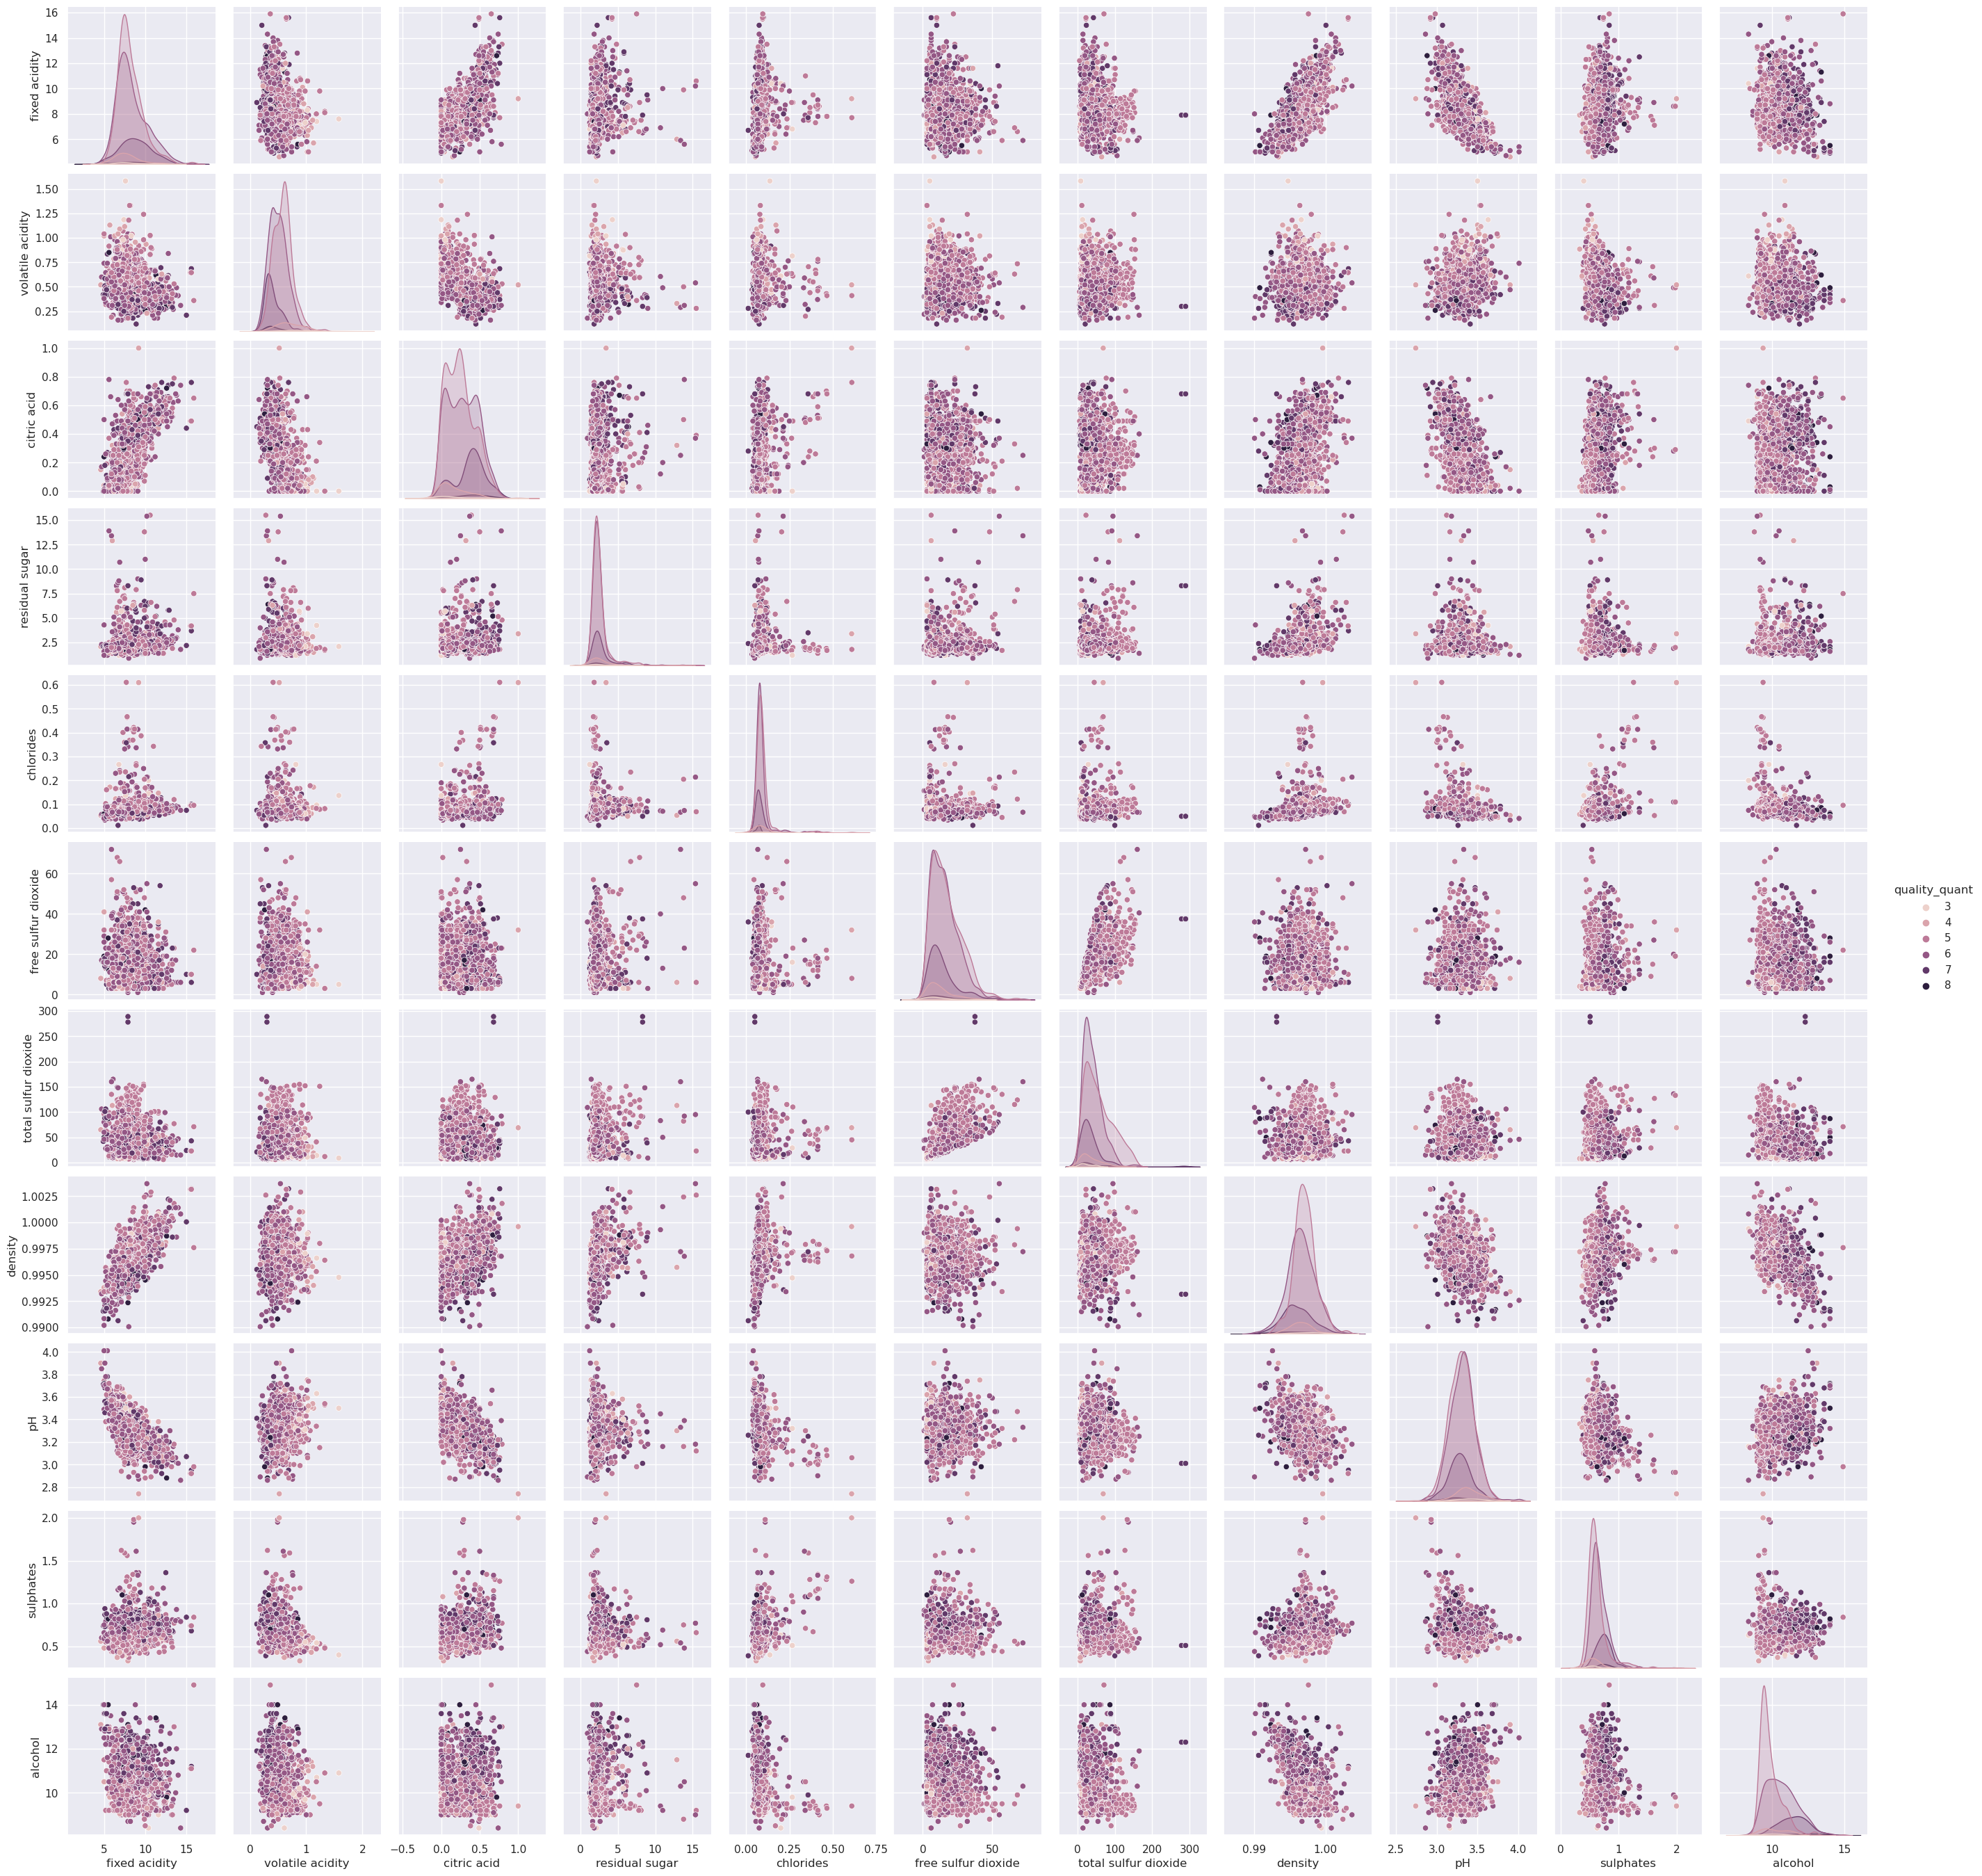

In [6]:
sns.pairplot(wine, hue='quality_quant', diag_kind="kde")
plt.show()

Visually, it seems like *alcohol*, *citric acid* and *sulphates* have a positive correlation with the *quality* variable. To check my findings, I display the correlation matrix of *wine* further.

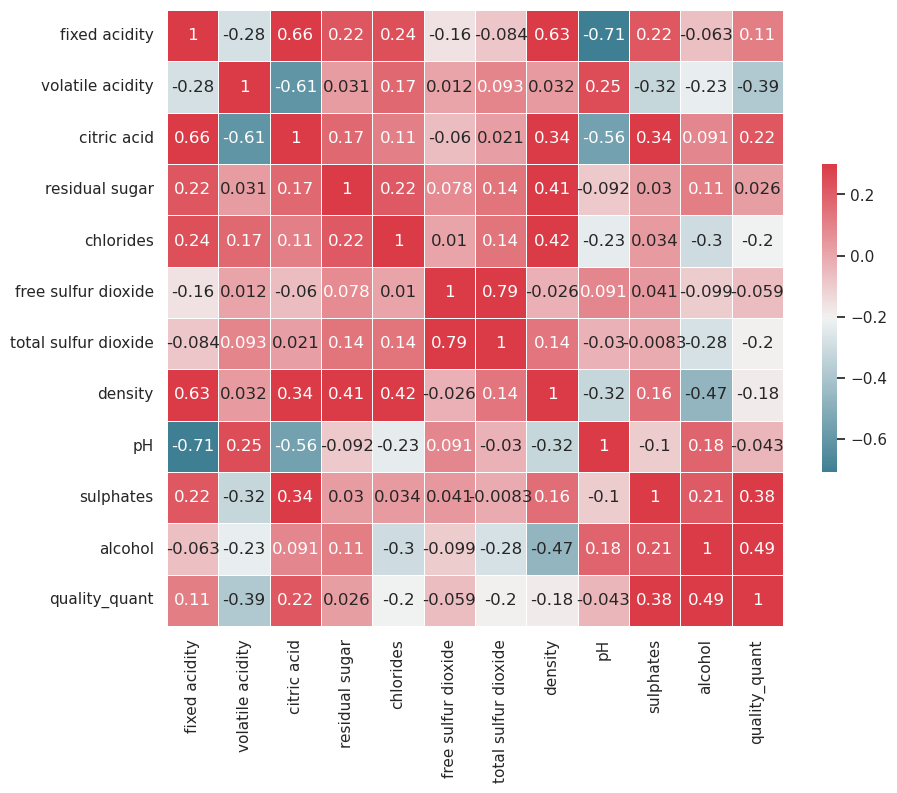

In [7]:
corr = wine.corr(method='spearman')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

The matrix shows, that there is a considerable positive correlation between *alcohol*, *sulphates* and *quality*. There is also a notable negative correlation between *quality* and *volatile acidity*. We can drop *pH*, *free sulfur dioxide*, *residual sugar*, since their influence on the target variable is insignificant.

In [8]:
#wine.drop("residual sugar", axis=1, inplace=True)
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_quant'],
      dtype='object')

# KNN class

In [9]:
#splitting select df columns into training and test data
X = wine.to_numpy()
y = wine['quality_quant'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#scaling the input features, so that the ranges of each predictor are similar.
#not scaling the variables will result in poorer model performance and bias towards
#features with a greater magnitude, which we do not want in a distance-based algorithm

#upon applying the standard scaler, we obtain data centered around 0 with mean=0, standard deviation=1.
#this also results in normal distribution-like properties of data
#scaler_standard = StandardScaler()
#X_train_scaled = scaler_standard.fit_transform(X_train)
#X_test_scaled = scaler_standard.transform(X_test)

#the MinMax scaler, on the other hand, normalizes the variables to fall within the range [0,1]
#useful for data, needed in bounded intervals 
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

In [10]:
#the KNN classifier setup, using euclidian distance as the distance metric
def eudist(p1, p2):
    dist = np.sqrt(np.sum((p1 - p2) ** 2))
    
    return dist

In [11]:
#manhattan distance
def manhattan(p1,p2):
    dist = np.sum(np.abs(p1 - p2))
    
    return dist

In [12]:
#chebyshev distance
def chebyshev(p1,p2):
    dist = np.max(np.abs(p1-p2))
    
    return dist

In [13]:
class KNN():
    """
    The k-Nearest-Neighbours class.  
    """
    def __init__(self, k=3, p=1, metric='euclidian'): #p is a placeholder for the minkowski distance implementation
        self.k = k
        self.metric = metric
        self.p = p
        self.predictions = []
        self.predictions_unscaled = []
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X, metric='euclidian'):
        predictions = np.array([self._predict(x, metric) for x in X])
        
        self.predictions = predictions
        
        return predictions 
        
    def _predict(self, x, metric='euclidian'):
        if metric == 'euclidian':
            distances = [eudist(x, row) for row in self.X_train]
            
        elif metric == 'manhattan':
            distances = [manhattan(x, row) for row in self.X_train]
        
        elif metric == 'chebyshev':
            distances = [chebyshev(x, row) for row in self.X_train]
 
        knearest = np.argsort(distances)[:self.k]
        knearest_labels = [self.y_train[idx] for idx in knearest]
        pred = Counter(knearest_labels).most_common(1)[0][0]
        
        return pred
    
    def accuracy(self):
        correct_predictions = np.sum(self.predictions == y_test)
        total_predictions = len(y_test)
        accuracy = (correct_predictions / total_predictions) * 100
        
        return accuracy

In [14]:
#demonstrating the KNN class in action
classifier = KNN(k=3) 
classifier.fit(X_train_scaled, y_train)

In [15]:
classifier.predict(X_test_scaled)
print(f'the accuracy of a euclidian-based KNN classifier, k={classifier.k}: {classifier.accuracy()}')

the accuracy of a euclidian-based KNN classifier, k=3: 91.91176470588235


In [16]:
classifier.predict(X_test_scaled, metric='manhattan')
print(f'the accuracy of a manhattan-based KNN classifier, k={classifier.k}: {classifier.accuracy()}')

the accuracy of a manhattan-based KNN classifier, k=3: 91.91176470588235


In [17]:
classifier.predict(X_test_scaled, metric='chebyshev')
print(f'the accuracy of a chebyshev-based KNN classifier, k={classifier.k}: {classifier.accuracy()}')

the accuracy of a chebyshev-based KNN classifier, k=3: 92.64705882352942


# Observations 
Upon experimenting with the *k* values, test data size and metrics, I found that Euclidian distance was the least efficient one on average, while in most cases Chebyshev and Manhattan ones were pretty similar. Towards the end of optimizing the *k* value in the case of Standard scaling, it became clear that the Euclidian distance is completely ineffective for this problem, since it does not scale well to higher dimensions. However, in MinMax scaling, Euclidian distance shows the same result as Chebyshev distance.  

# Conclusions
For this problem, the Chebyshev and Euclidian distances metrics proved to be the most effective ones, their accuracy for *k*=3 being 94.85% (for MinMax scaled features). The KNN algorithm is optimal for classifying new data, unseen by the model. The current choice of features, upon various tweaks of the list of the considered variables, turned out to be the one leading to the best performance of the model. 